# <span style=color:red> Model Development Pratice Lab </span>

##### In this lab, you will use the skills acquired in throughout the module, and use linear regression principles to create a model that predicts the Price of the laptop, based on one or more attributes of the dataset.

# Objectives

After completing this lab you will be able to:

 - Use Linear Regression in one variable to fit the parameters to a model
 - Use Linear Regression in multiple variables to fit the parameters to a model
 - Use Polynomial Regression in single variable tofit the parameters to a model
 - Create a pipeline for performing linear regression using multiple features in polynomial scaling
 - Evaluate the performance of different forms of regression on basis of MSE and R^2 parameters


### Importing Required Libraries


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

### Importing the dataset

In [18]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(filepath, header=0)

In [19]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# Task 1 : Single Linear Regression
#### a.) "CPU_frequency" is the parameter with the lowest p-value among the different features of the dataset. Create a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction.

In [27]:
# # Create the linear regression model
lm = LinearRegression()


# X: Input variable as the RAM column, Y: Output variable as the Price column
X = df[['CPU_frequency']]
Y = df['Price']


# Train the model
lm.fit(X,Y)

# Make predictions using X
Yhat=lm.predict(X)

#### b.) Generate the Distribution plot for the predicted values and that of the actual values. How well did the model perform?

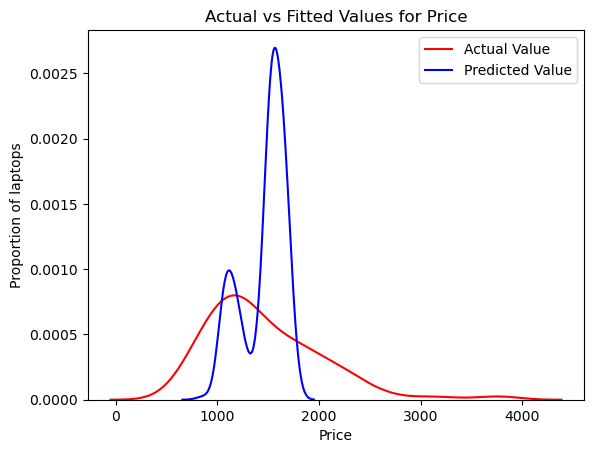

In [32]:
#This code creates an axis object (ax1) that plots the distribution of the actual prices.
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

#### Evaluating Model Performance, In the plot:
##### The red curve represents the distribution of the actual laptop prices.
##### The blue curve represents the distribution of the prices predicted by the model.
##### If the blue and red curves overlap closely, it indicates that the model is performing well, as the predicted values are close to the actual values.
##### If there is a significant gap between the blue and red curves, it suggests that the model is making errors and the predictions are not accurately matching the actual values.
##### Overall, this plot is a powerful tool for visually assessing the performance of the model. The closer the curves are to each other, the better the model is at predicting the prices. A noticeable difference between the curves indicates that there may be room for improvement in the model.

#### c.) Evaluate the Mean Squared Error and R^2 score values for the model.

In [35]:
mse_slr = mean_squared_error(df['Price'], Yhat)
r2_score_slr = lm.score(X, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

The R-square for Linear Regression is:  0.13444363210243238
The mean square error of price and predicted value is:  284583.44058686297


# Task 2 - Multiple Linear Regression

#### a.) The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression system.

In [51]:
lm1 = LinearRegression()

Z = df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']] #Selecting features

lm1.fit(Z,Y)

Y_hat = lm1.predict(Z)

####  b.) Plotting the Distribution Graph
####  To visually assess the model's performance, we'll plot the distribution of the predicted values (Fitted Values) and the actual values (Actual Value):

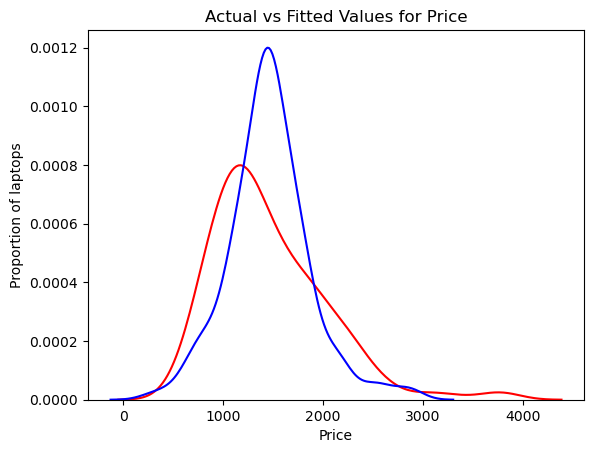

In [48]:
# Plotting the distribution of actual values
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

# Plotting the distribution of predicted values
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values", ax=ax1)

# Configuring the plot
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.show()

#### c.) Next, we calculate the R^2 score and the Mean Squared Error (MSE) to evaluate how well the model performed:

In [55]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculating MSE and R^2 Score
mse = mean_squared_error(Y, Y_hat)
r2 = r2_score(Y, Y_hat)

print("Mean Squared Error:", mse)  # A lower MSE indicates better model performance.
print("R^2 Score:", r2)  # An R^2 score close to 1 indicates good model performance.

Mean Squared Error: 161680.5726389311
R^2 Score: 0.5082509055187374


#### d.) Performance Comparison
##### Finally, the R^2 score and MSE value obtained from the Multiple Linear Regression model are compared to those from the Single Linear Regression model.
##### If the R^2 score is higher and the MSE is lower, the Multiple Linear Regression model is performing better.
##### If the opposite is true, then the model is performing worse.
##### This comparison allows you to determine how well the model is performing. If the Multiple Linear Regression model performs better, it means the additional features selected have improved the accuracy of the predictions. So, MLR is better

# Task 3 - Polynomial Regression
#### a.) Use the variable "CPU_frequency" to create Polynomial features. Try this for 3 different values of polynomial degrees. Remember that polynomial fits are done using `numpy.polyfit`. 

##### We start by converting CPU_frequency into a NumPy array and flattening it for use in the polynomial fitting function. Then, we'll create polynomial models of degrees 1, 3, and 5 using numpy.polyfit:

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Convert to NumPy array and flatten
X = df['CPU_frequency'].to_numpy().flatten()

# Polynomial fit with degree 1
f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

# Polynomial fit with degree 3
f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

# Polynomial fit with degree 5
f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)


#### b.) Defining the Plotting Function
##### Next, we'll define a function to plot the polynomial regression lines over the actual data points:

In [65]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    # Generate new values for plotting the polynomial curve
    x_new = np.linspace(independent_variable.min(), independent_variable.max(), 100)
    y_new = model(x_new)

    # Plot the actual data points and the polynomial fit
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    
    # Set the background color and labels
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')
    plt.show()


#### c.) Plotting the Results
##### Now, we use the PlotPolly function to visualize how well each polynomial degree fits the data:

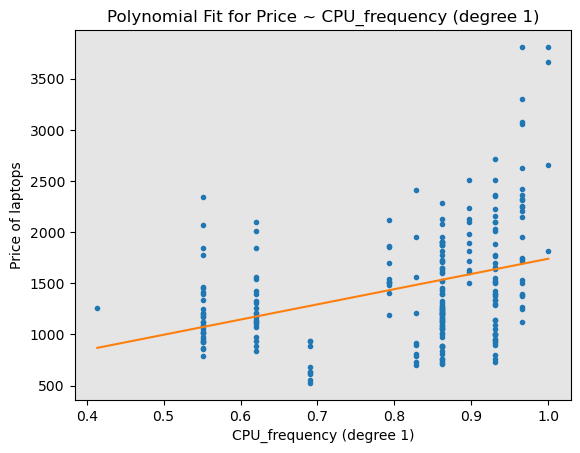

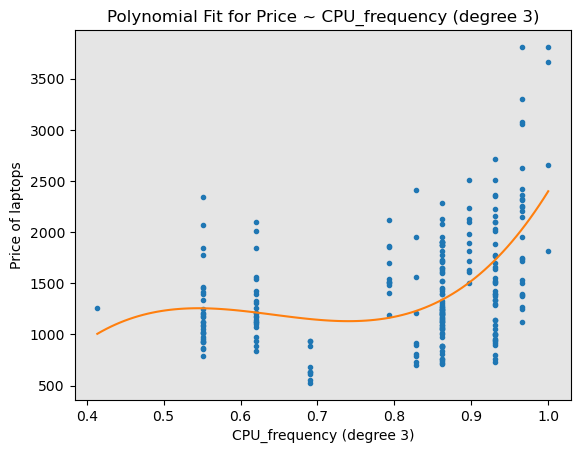

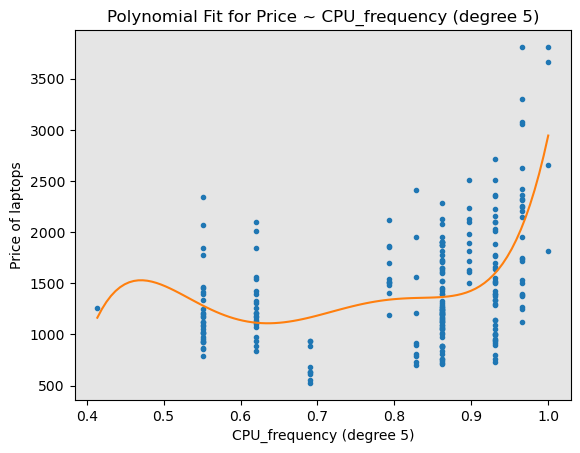

In [68]:
# Plotting Polynomial Fit with degree 1
PlotPolly(p1, X, Y, 'CPU_frequency (degree 1)')

# Plotting Polynomial Fit with degree 3
PlotPolly(p3, X, Y, 'CPU_frequency (degree 3)')

# Plotting Polynomial Fit with degree 5
PlotPolly(p5, X, Y, 'CPU_frequency (degree 5)')


##### Degree 1 (Linear Fit): This is a simple linear regression, and the fit will be a straight line. If the relationship between CPU_frequency and Price is not linear, this fit might not capture the complexity of the relationship.

##### Degree 3 (Cubic Fit): This fit introduces more flexibility, allowing the model to capture some curvature in the data. It might provide a better fit if the relationship is slightly non-linear.

##### Degree 5 (Quintic Fit): This fit allows even more flexibility, potentially capturing more intricate patterns in the data. However, it could also lead to overfitting, where the model becomes too sensitive to noise in the data rather than capturing the underlying trend.

##### By comparing these plots, you can visually assess which polynomial degree provides the best balance between accurately capturing the underlying trend in the data and avoiding overfitting.

#### d.) Also, calculate the R^2 and MSE values for these fits. For polynomial functions, the function sklearn.metrics.r2_score will be used to calculate R^2 values.
##### It’s important to balance model complexity with interpretability and avoid overfitting. While the 5th degree polynomial fits the data better, it may also be more sensitive to noise and may not generalize well to new data.

In [72]:
r_squared_1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y,p1(X)))
r_squared_3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y,p3(X)))
r_squared_5 = r2_score(Y, p5(X))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y,p5(X)))

The R-square value for 1st degree polynomial is:  0.1344436321024326
The MSE value for 1st degree polynomial is:  284583.4405868629
The R-square value for 3rd degree polynomial is:  0.26692640796531075
The MSE value for 3rd degree polynomial is:  241024.8630384878
The R-square value for 5th degree polynomial is:  0.3030822706444086
The MSE value for 5th degree polynomial is:  229137.29548052896


# Task 4 - Pipeline
#### a.) Create a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression. Use the set of multiple features as before to create this pipeline.

In [76]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)

#### b.) Evaluate the MSE and R^2 values for the this predicted output.

In [79]:
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))

MSE for multi-variable polynomial pipeline is:  123524.375
R^2 for multi-variable polynomial pipeline is:  0.6243024219844482


##### Summary of Results
##### Single Linear Regression: Provides a basic fit with a simple linear relationship between one feature and the target.
##### Multiple Linear Regression: Involves more features and usually improves the R^2 value compared to single linear regression because it accounts for more variables.
##### Polynomial Features with Linear Regression: Adding polynomial features extends the model's capability to capture more complex relationships, further increasing the R^2 value and potentially improving predictions.
##### By evaluating these models, you observe that as you move from single linear regression to multiple linear regression, and then to polynomial features with linear regression, the R^2 value generally increases, reflecting an improved fit to the data. The pipeline approach ensures that these transformations are applied consistently and efficiently.